Auxiliary functions

           

In [1]:
from aux import extrapolate_in_time, interpolate_in_space, grad

Advectee and advector initialization

In [2]:
from MPyDATA import ScalarField, VectorField, PeriodicBoundaryCondition
import numpy as np
dx = 2.4
dt = 0.1
nx = 40

#initial state of liquid
initial_m_value = 0.2
h_initial = np.full(nx, initial_m_value)
h_initial[8:20] = np.array([0.8 - (0.02 * i)  for i in range(12)])

h_old = np.array(h_initial)
h_new = np.array(h_initial)

uh_new = np.zeros(nx)
uh_old = np.zeros(nx)

#initial movement vector
u_initial = np.zeros((nx + 1))
u_old = np.array(u_initial)
u_new = np.array(u_initial)

rhs_old = np.array(h_old)
rsh_old = np.zeros(nx)


from MPyDATA.options import Options
options = Options(n_iters=2, infinite_gauge=True, flux_corrected_transport=True)
halo = options.n_halo

advectee = ScalarField(
    data = h_new,
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(), )
)

advector = VectorField(
    data = (u_initial,),
    halo=halo,
    boundary_conditions=(PeriodicBoundaryCondition(), )   
)

print('h_new', h_new,'\n')
print('u_new', u_initial,'\n')
print('grad', grad(h_new, dx=dx),'\n')

h_new [0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.8  0.78 0.76 0.74 0.72 0.7
 0.68 0.66 0.64 0.62 0.6  0.58 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 ] 

u_new [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

grad [ 0.          0.          0.          0.          0.          0.
  0.          0.125       0.12083333 -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333 -0.00833333
 -0.00833333 -0.08333333 -0.07916667  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ] 



MPyDATA wrapper

In [3]:
from mpdata import mpdata_wrapper
MPDATA = mpdata_wrapper(advector, advectee, (nx,))

Initial state

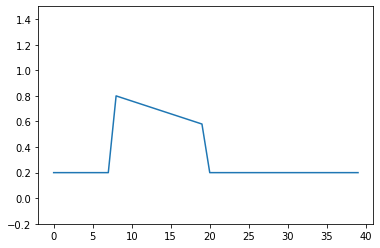

In [4]:
import matplotlib.pyplot as plt

axes = plt.gca()
plt.ylim(-.2, 1.5)
plt.plot(h_new, '-')
plt.show()

Main loop

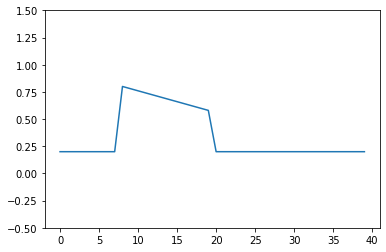

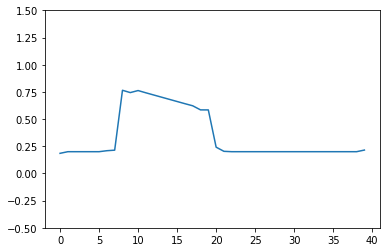

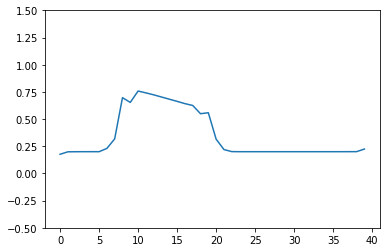

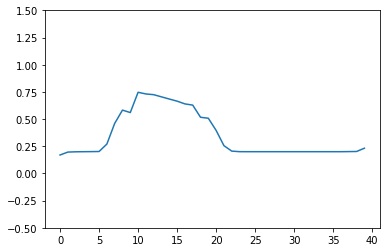

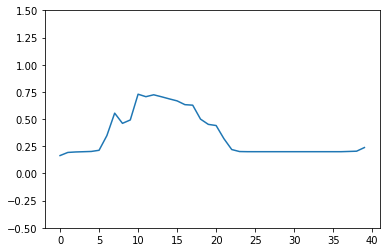

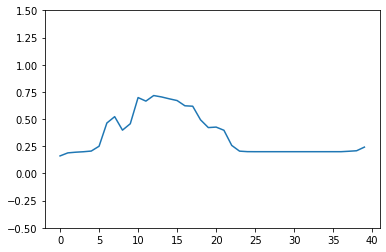

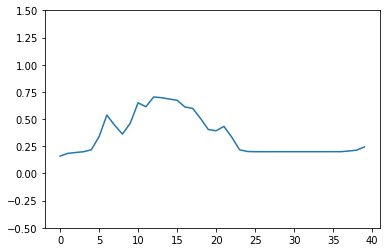

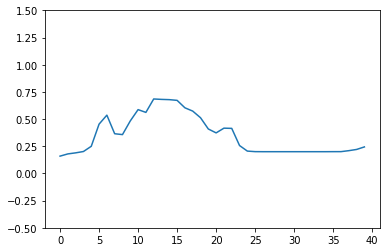

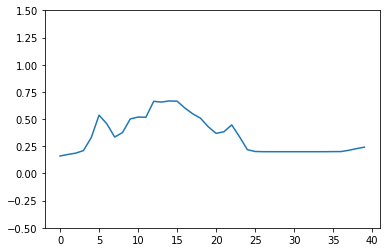

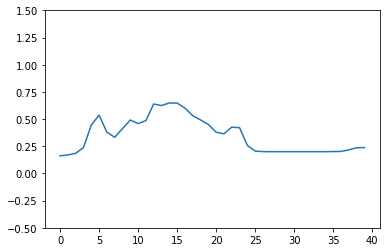

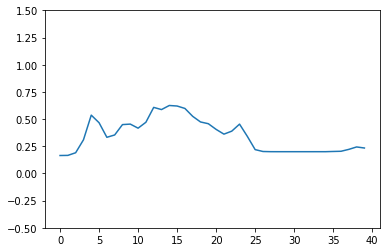

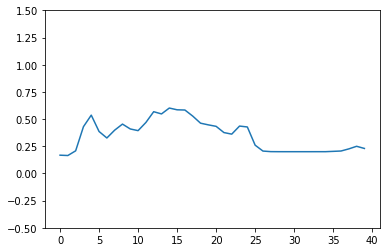

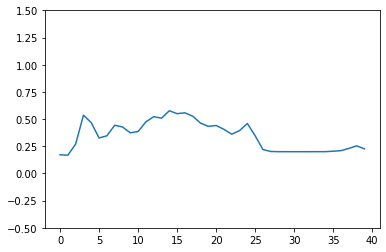

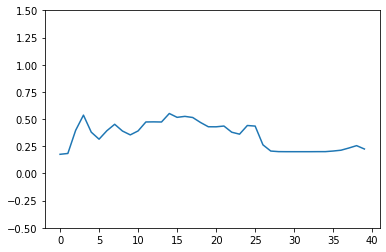

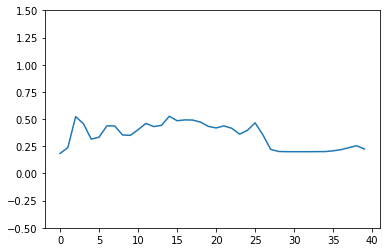

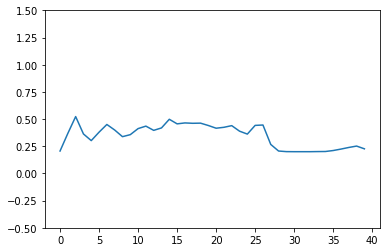

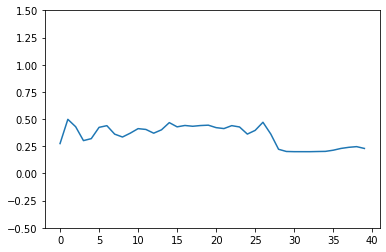

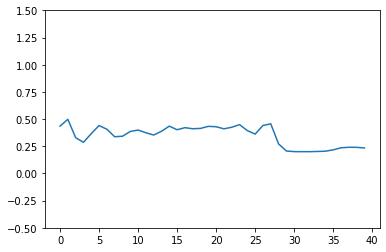

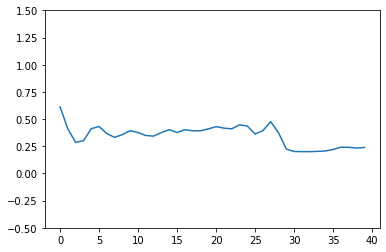

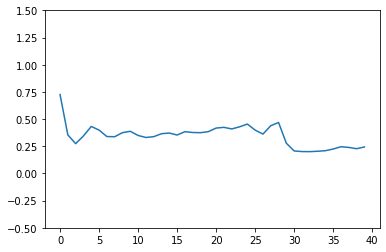

In [5]:
g = 9.8 # m/s^2
for i in range(20):
    u_mid = extrapolate_in_time(interpolate_in_space(uh_new, h_new), interpolate_in_space(uh_old, h_old))
    
    #RHS = 0, mass conservation
    h_new[:] = MPDATA(u_mid, h_old)
    rhs_new = -g *  h_new * grad(h_new, dx=dx)

    #momentum conservation
    uh_new[:] = MPDATA(u_mid, uh_old + .5 * dt * rhs_old) + .5 * dt * rhs_new
    
    #plot figure
    plt.ylim(-.5, 1.5)
    plt.plot(h_new, '-')
    plt.show()
    
    # replace variables
    h_old, h_new = h_new, h_old
    u_old, u_new = u_new, u_old
    rhs_old, rhs_new = rhs_new, rhs_old
    uh_old, uh_new = uh_new, uh_old

    